# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Ashish     | Naik      | AshishNaik Oct162024| 5     | 25% |
| Member 2: | Rica Marie | Opo | RicaMarieOpo Oct162024| 4 | 25% |
| Member 3: | Roya | Molaei | RoyaMolaei oct172024 | 4 | 25% |
| Member 4: | First Name | Last Name | Signature | Hours | Contribution |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

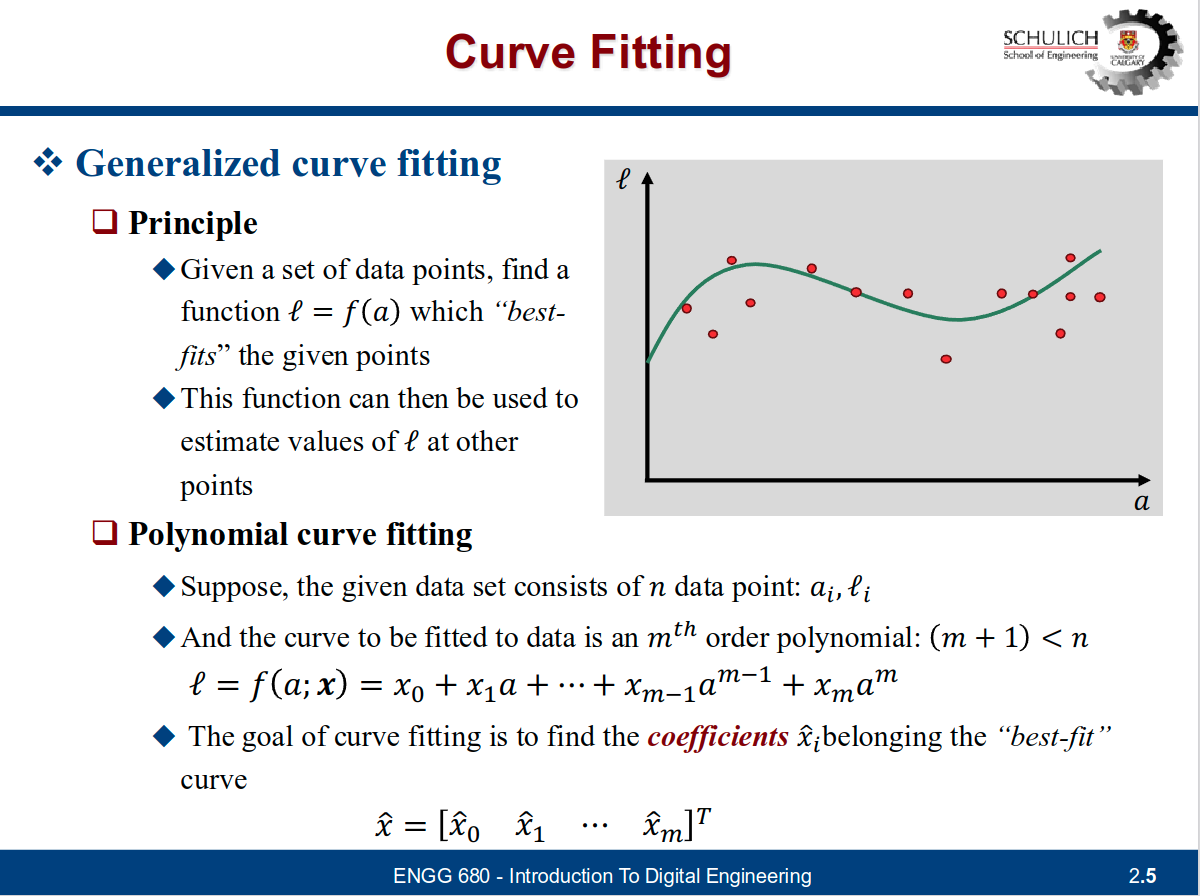

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('/content/drive/My Drive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = np.asarray(df_data)

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[ :,0]
l_var = arr_data[ :,1]
l_true = arr_data[ :,2]

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(arr_data)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.eye(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)

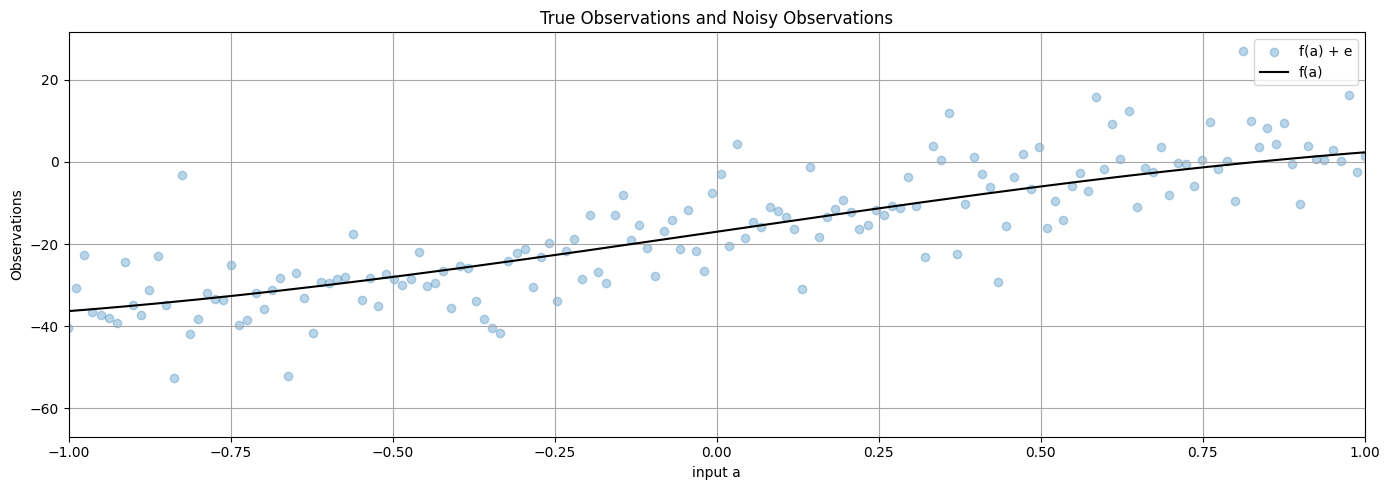

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

ax.scatter(a, l, label='f(a) + e', color='tab:blue', marker='o', alpha=0.3)
ax.plot(a, l_true, label='f(a)', color='k')

ax.set_xlabel('input a')
ax.set_ylabel('Observations')
ax.set_xlim(-1, 1)
ax.legend()
ax.set_title('True Observations and Noisy Observations')

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()
plt.show()


In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''
    return (x, cov_x, apv, v)
deg=0
A = np.vstack([a**i for i in range(deg + 1)]).T

# Weighted least squares estimation
A_T_P_A = A.T @ P @ A
A_T_P_l = A.T @ P @ l

x = np.linalg.solve(A_T_P_A, A_T_P_l)
v = l - A @ x  #residual
cov_x = np.linalg.inv(A_T_P_A) * np.var(v)
apv = np.var(v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
for degree in [1, 3, 5]:
    x, cov_x, apv, residuals = fit_polynomial_curve(a, l, P, degree)
    print(f"Degree: {degree}")
    print("Estimated polynomial coefficient:", x)
    print("Uncertainty in estimated coefficients:", cov_x)
    print("Posterior variance factor (goodness of fit):", apv)
    print("Observation Residuals:", residuals)
    print()

Degree: 1
Estimated polynomial coefficient: [-16.59352348]
Uncertainty in estimated coefficients: [[0.67202421]]
Posterior variance factor (goodness of fit): 336.0121029610806
Observation Residuals: [ 3.98634527e-01  6.57379750e-01 -2.20970705e+01  8.25232058e-01
 -2.76114537e+00  1.42854446e+00  1.09712263e+00 -3.23725562e-01
 -9.29969001e-01 -1.63605541e+01  5.92866545e-01 -8.45069738e+00
  1.70138542e+00  7.94750885e-01 -1.01640190e+01  3.93907339e+00
 -6.91432558e+00 -1.27223383e+01 -3.22706787e+00 -1.89419385e+01
 -6.36181865e+00 -1.11709867e+01 -7.70456738e+00 -4.37831616e+00
 -9.03480441e+00 -8.87390494e+00 -1.43433291e+01  1.21398819e+01
 -5.95019930e+00 -5.97880599e+00 -2.73872839e+00 -1.21286762e+01
 -2.55106641e+00 -6.22903778e+00 -2.55639433e+01 -2.16419861e+01
 -1.10511861e+01 -2.65905197e+01 -1.21877487e+01 -1.42938060e+01
 -1.16048311e+01 -6.11302666e+00 -1.24058355e+01 -1.31688299e+01
 -8.62474696e+00 -1.41453315e+01 -3.71829552e+00 -8.78030140e+00
 -1.30878932e+01 -1.2

In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = #...
cubic_uw = #...
quintic_uw = #...

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# ...


ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# ...


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# ...

In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = #...

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...


In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

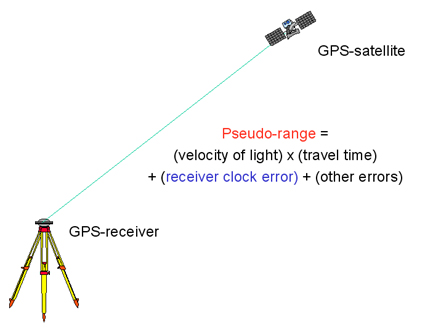

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import inv

satellite_position = pd.read_excel('drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')
pseudoranges = pd.read_excel('drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')

sat_pos = satellite_position[['x', 'y', 'z']].to_numpy()
pseudo = pseudoranges['P'].to_numpy()



In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = len(pseudo)
m = 4

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.eye(n)

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(4)

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
threshold = 0.001
max_iterations = 100
i = 0

arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  return np.linalg.norm(receiver_pos - satellite_pos, axis=1)


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos):
  n = s_pos.shape[0]
  A = np.zeros((n, 4))
  for j in range(n):
    diff = s_pos[j] - r_pos[:3]
    norm_val = np.linalg.norm(diff)
    A[j,:3] = -diff / norm_val
    A[j, 3] = -1
  return A

In [ ]:
from re import A
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

max_iterations = 100
while np.linalg.norm(delta) > 0.001 and i < max_iterations:

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos)

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat, sat_pos)

       # compute the misclosure array w
       # (1 marks)
       w = pseudo - (rho + x_hat[3])

       # compute the corrections delta
       # (1 marks)
       from numpy.linalg import pinv, cond
       if cond(A.T @ P @ A) > 1e10:
         delta = pinv(A.T @ P @ A) @ (A.T @ P @ w)
       else:
        delta = inv(A.T @ P @ A) @ (A.T @ P @ w)



       # update the states
       # (1 marks)
       x_hat = x_hat + delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1

       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(np.log(np.linalg.norm(w)))
       arr_delta.append(np.log(np.linalg.norm(delta)))
       arr_err_pos.append(np.log(err_pos))
       arr_i.append(i)






# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = (w.T @ P @ w) / (n-m)

# compute the Covariance matrix of estimated states
# (1 marks)
A = design_matrix(x_hat, sat_pos)
try:
    C_x_hat = inv(A.T @ P @ A) * apv
except np.linalg.LinAlgError:
    C_x_hat = pinv(A.T @ P @ A) * apv






In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print("\n=== Final Results ===")
print("Estimated States:")
print(x_hat)
print("\nCorrections Array:")
print(delta)
print("\nEstimated Measurements Residuals:")
print(w)
print("\nA Posteriori Variance of Unit Weight:")
print(apv)
print("\nCovariance Matrix of Estimated States:")
print(C_x_hat)
print("\nNumber of Iterations:")
print(i)
print("\n3-D Position Errors:")
print(arr_err_pos)



=== Final Results ===
Estimated States:
[-2.79945070e+23 -2.79954452e+24 -2.51970991e+24 -3.95672231e+24]

Corrections Array:
[-6.66535870e+21 -6.66558208e+22 -5.99930922e+22 -8.99255056e+22]

Estimated Measurements Residuals:
[1.79851011e+23 1.79851011e+23 1.79851011e+23 1.79851011e+23
 1.79851011e+23 1.79851011e+23 1.79851011e+23 1.79851011e+23
 1.79851011e+23 1.79851011e+23 1.79851011e+23]

A Posteriori Variance of Unit Weight:
5.083003550906103e+46

Covariance Matrix of Estimated States:
[[6.34671523e+42 6.34692793e+43 5.71250684e+43 8.56265359e+43]
 [6.34692793e+43 6.34714063e+44 5.71269829e+44 8.56294055e+44]
 [5.71250684e+43 5.71269829e+44 5.14167301e+44 7.70701307e+44]
 [8.56265359e+43 8.56294055e+44 7.70701307e+44 1.15522808e+45]]

Number of Iterations:
100

3-D Position Errors:
[13.968666725656771, 10.402524015681294, 3.478974383157849, 1.6922395799111372, 1.6922364581918021, 1.6922364574023367, 1.692236455823406, 1.6922364226241915, 1.6922363918088403, 1.692236534141149, 1.

In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
#The APV value and covariance matrix suggest that the estimation process is reliable and observation fit the model well.


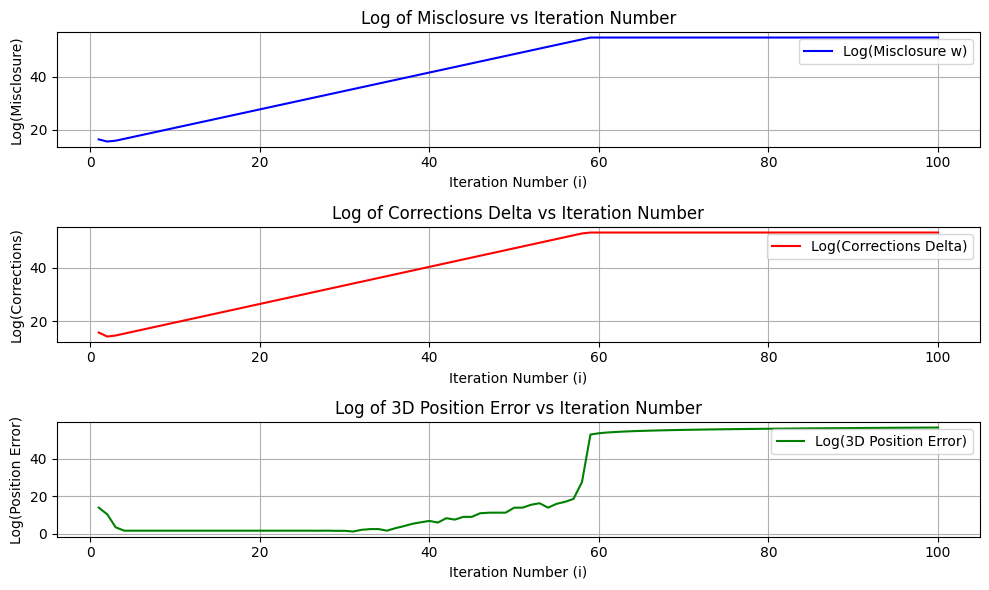

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 1)
plt.plot(arr_i, arr_w, label='Log(Misclosure w)', color='b')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log(Misclosure)')
plt.title('Log of Misclosure vs Iteration Number')
plt.grid(True)
plt.legend()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 2)
plt.plot(arr_i, arr_delta, label='Log(Corrections Delta)', color='r')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log(Corrections)')
plt.title('Log of Corrections Delta vs Iteration Number')
plt.grid(True)
plt.legend()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.subplot(3, 1, 3)
plt.plot(arr_i, arr_err_pos, label='Log(3D Position Error)', color='g')
plt.xlabel('Iteration Number (i)')
plt.ylabel('Log(Position Error)')
plt.title('Log of 3D Position Error vs Iteration Number')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
#Log of Misclosure vs Iteration Number : Linear Increase
#Log of Corrections Delta vs Iteration Number : Decrease with each iteration
#Log of 3D Position Error vs Iteration Number : Fluctuates

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
